## Model Comparisons

Load useful libraries

In [77]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [9]:
data_dir = Path(".").absolute().parent / "data"
models_dir = data_dir / "models"
results_all_df = pd.read_csv(models_dir / "classification_stats.csv")
results_all_df

,model,pred_target,feature_group,accuracy,f1
0,lr,super_class,node2vec,0.826011,0.532225
1,mlp,super_class,node2vec,0.892060,0.578130
2,lr,super_class,spectral,0.760156,0.382442
3,mlp,super_class,spectral,0.848514,0.490799
4,lr,super_class,both,0.845397,0.576415
5,mlp,super_class,both,0.901900,0.603827
6,lr,class,node2vec,0.898179,0.834041
7,mlp,class,node2vec,0.919502,0.842513
8,lr,class,spectral,0.730714,0.570062
9,mlp,class,spectral,0.889554,0.776716


### Grouped bar chart with labels

In [13]:
results_both = results_all_df[results_all_df.feature_group == 'both']

In [21]:
results_both

,model,pred_target,feature_group,accuracy,f1
4,lr,super_class,both,0.845397,0.576415
5,mlp,super_class,both,0.901900,0.603827
10,lr,class,both,0.906564,0.848859
11,mlp,class,both,0.918543,0.841923
16,lr,hemilineage,both,0.495548,0.566189
17,mlp,hemilineage,both,0.487418,0.567489
20,gcn,super_class,both,0.899980,0.659091
23,gcn,class,both,0.910511,0.829748
26,gcn,hemilineage,both,0.546651,0.599960
29,FP,super_class,both,0.884764,0.533541


In [75]:
accuracies = {}
for m in results_both.model.unique():
    accuracies[m] = (results_both[results_both.model == m].accuracy).values.round(2).tolist()
accuracies

{'lr': [0.85, 0.91, 0.5],
 'mlp': [0.9, 0.92, 0.49],
 'gcn': [0.9, 0.91, 0.55],
 'FP': [0.88, 0.92, 0.58]}

lr
[0.85, 0.91, 0.5]
[0 1 2]
mlp
[0.9, 0.92, 0.49]
[0 1 2]
gcn
[0.9, 0.91, 0.55]
[0 1 2]
FP
[0.88, 0.92, 0.58]
[0 1 2]


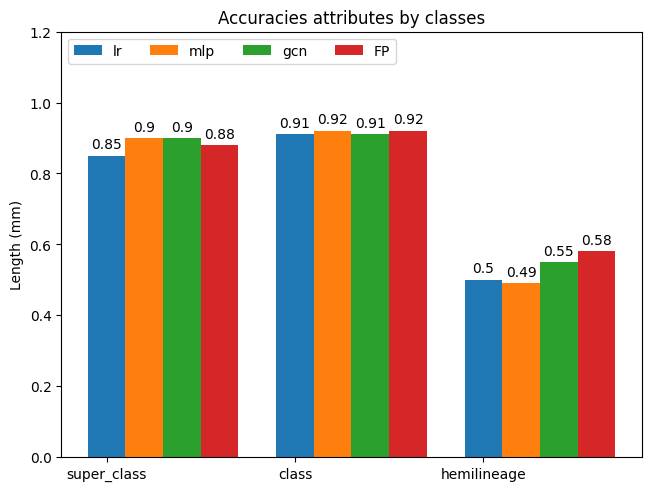

In [76]:
classes = results_all_df.pred_target.unique()

accuracies = {}
for m in results_both.model.unique():
    accuracies[m] = (results_both[results_both.model == m].accuracy).values.round(2).tolist()

x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars
multiplier = 1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracies.items():
    print(attribute)
    print(measurement)
    offset = width * multiplier
    print(x )
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Accuracies attributes by classes')
ax.set_xticks(x + width, classes)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.2)

plt.show()

### Confusion Matrix for FP

In [ ]:
pred_all = []
target_all = []
for inputs, targets in val_loader:
    outputs = mlp_model(inputs.to(device))
    preds = torch.argmax(outputs, dim=1)
    pred_all.append(preds.cpu().numpy())
    target_all.append(targets.numpy())
pred_all = np.concatenate(pred_all)
target_all = np.concatenate(target_all)

In [ ]:
cmat = confusion_matrix(pred_all, target_all)
plt.imshow(np.log10(cmat))
# plt.imshow(cmat)
plt.colorbar(label="log(count)")
plt.xticks(
    range(len(class_id2name)),
    [class_id2name[i] for i in range(len(class_id2name))],
    rotation=90,
)
plt.yticks(
    range(len(class_id2name)),
    [class_id2name[i] for i in range(len(class_id2name))],
)
plt.title("Confusion matrix (log scale)")